In [364]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
import ipympl

from mpl_toolkits import mplot3d

from DynHouseholdLaborModel import DynHouseholdLaborModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [365]:
baseline = DynHouseholdLaborModelClass(par={'mu':0.5})
par = baseline.par
sol = baseline.sol
sim = baseline.sim
baseline.solve()
baseline.simulate()

In [366]:
lecture = DynHouseholdLaborModelClass(par={'mu':False})
le_par = lecture.par
le_sol = lecture.sol
le_sim = lecture.sim
lecture.solve()
lecture.simulate()

In [327]:
util = baseline.util(sim.h1,sim.h2,sim.k1,sim.k2)
le_util = lecture.util(le_sim.h1,le_sim.h2,le_sim.k1,le_sim.k2)
cons = baseline.consumption(sim.h1,sim.h2,sim.k1,sim.k2)
le_cons = lecture.consumption(le_sim.h1,le_sim.h2,le_sim.k1,le_sim.k2)

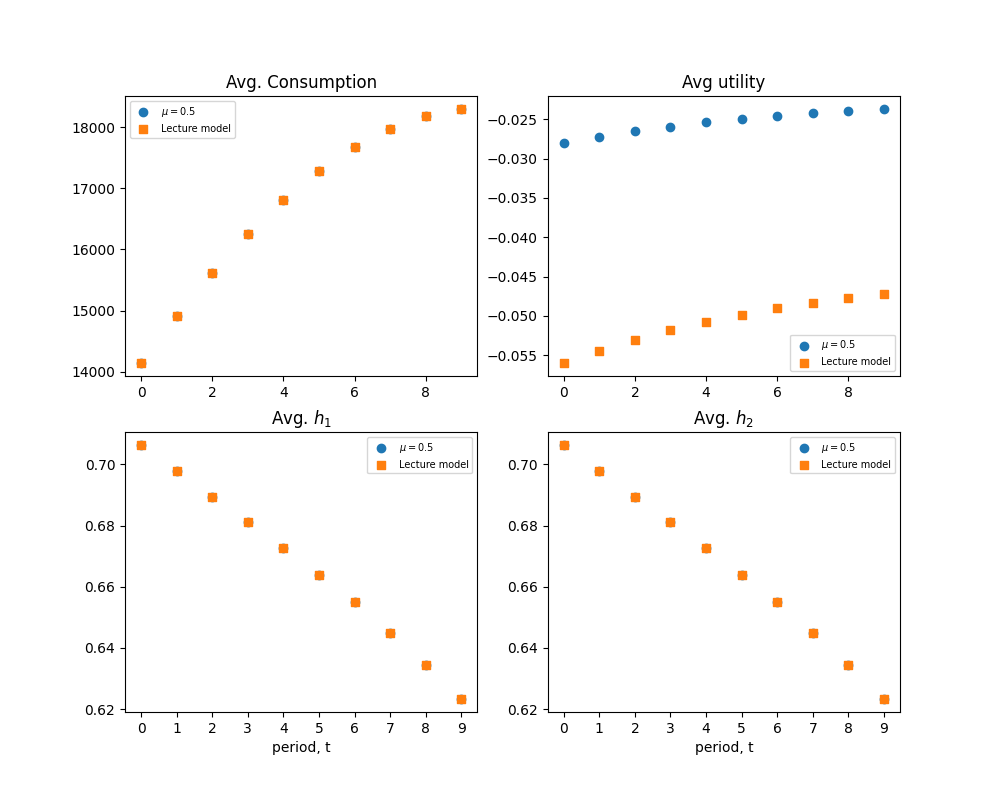

In [328]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0,0].scatter(range(par.simT),np.mean(cons,axis=0),label='$\mu=0.5$')
axs[0,0].scatter(range(par.simT),np.mean(le_cons,axis=0),label = 'Lecture model', marker='s')
axs[0,0].set_title(label='Avg. Consumption')
axs[0,0].legend(loc='best', fontsize=7)

axs[0,1].scatter(range(par.simT),np.mean(util,axis=0),label='$\mu=0.5$')
axs[0,1].scatter(range(par.simT),np.mean(le_util,axis=0),label='Lecture model', marker='s')
axs[0,1].set_title(label='Avg utility')
axs[0,1].legend(loc='best', fontsize=7)

axs[1,0].scatter(range(par.simT),np.mean(sim.h1,axis=0),label='$\mu=0.5$')
axs[1,0].scatter(range(par.simT),np.mean(le_sim.h1,axis=0),label='Lecture model', marker='s')
axs[1,0].set_title(label='Avg. $h_1$')
axs[1,0].set(xlabel='period, t', xticks=range(par.simT))
axs[1,0].legend(loc='best', fontsize=7)

axs[1,1].scatter(range(par.simT),np.mean(sim.h2,axis=0),label='$\mu=0.5$')
axs[1,1].scatter(range(par.simT),np.mean(le_sim.h2,axis=0),label='Lecture model', marker='s')
axs[1,1].set_title(label='Avg. $h_2$')
axs[1,1].set(xlabel='period, t', xticks=range(par.simT))
axs[1,1].legend(loc='best', fontsize=7)
plt.subplots_adjust(hspace=0.2)

plt.show()

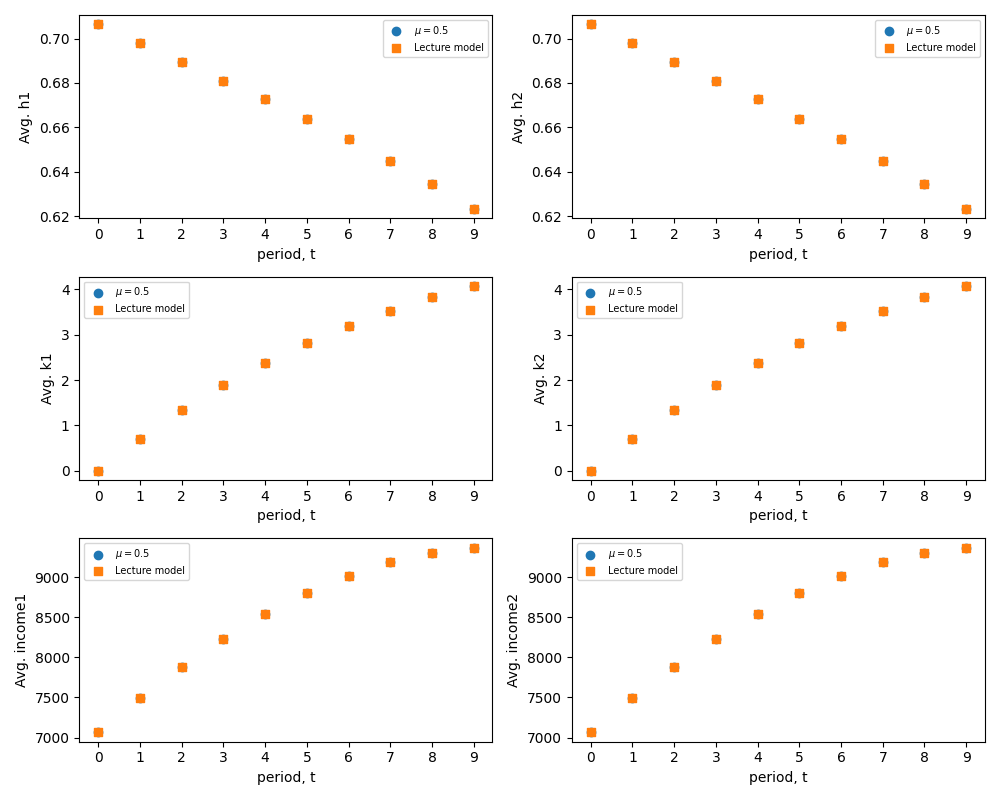

In [286]:

%matplotlib widget
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

for i, var in enumerate(('h1', 'h2', 'k1', 'k2', 'income1', 'income2')):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    line1 = ax.scatter(range(par.simT), np.mean(getattr(sim,var), axis=0), label='$\mu=0.5$')
    line2 = ax.scatter(range(par.simT), np.mean(getattr(le_sim,var), axis=0), label='Lecture model',marker='s')
    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(par.simT))
    leg = ax.legend(loc='best',fontsize=7)
plt.tight_layout()
plt.show()

## Q3

In [367]:
baseline = baseline.copy()
sol = baseline.sol
par = baseline.par
sim = baseline.sim
sim.k1_init = np.ones(par.simN)*2
baseline.solve()
baseline.simulate()

In [382]:
indi_model = DynHouseholdLaborModelClass(par={'mu':0.5,'joint_tax':0})
i_sol = indi_model.sol
i_par = indi_model.par
i_sim = indi_model.sim
#Initialize Agent 1 with human kapital K_1,0=2
i_sim.k1_init = np.ones(i_par.simN)*2
#K_2,0 = 0 by default
indi_model.solve()
indi_model.simulate()

In [383]:
util2 = baseline.util(sim.h1,sim.h2,sim.k1,sim.k2)
i_util = lecture.util(le_sim.h1,le_sim.h2,le_sim.k1,le_sim.k2)
cons = baseline.consumption(sim.h1,sim.h2,sim.k1,sim.k2)
i_cons = lecture.consumption(le_sim.h1,le_sim.h2,le_sim.k1,le_sim.k2)

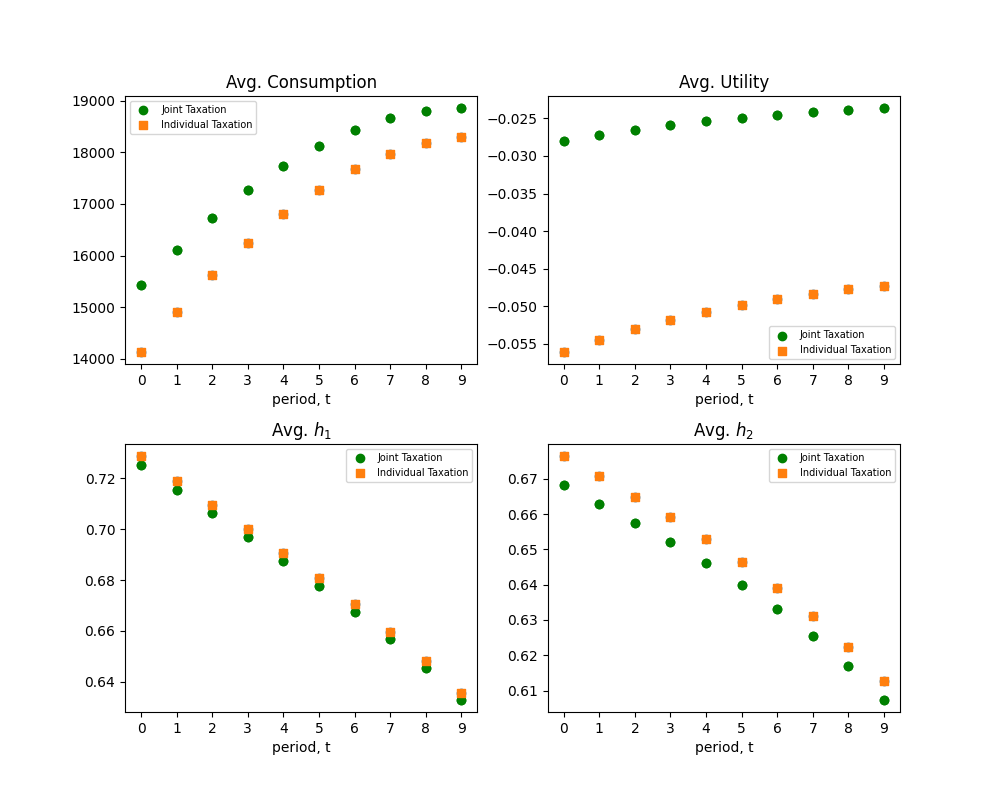

In [384]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

titles = ['Avg. Consumption', 'Avg. Utility', 'Avg. $h_1$', 'Avg. $h_2$']
data = [cons, util, sim.h1, sim.h2]
i_data = [i_cons, i_util, i_sim.h1, i_sim.h2]
labels = ['Joint Taxation', 'Individual Taxation']
for i in range(2):
    for j in range(2):
        axs[i,j].set_title(label=titles[2*i+j])
        axs[i,j].set(xlabel='period, t', xticks=range(par.simT))
        for k in range(len(labels)):
            axs[i,j].scatter(range(par.simT),np.mean(data[2*i+j],axis=0), label=labels[k] if k==0 else None,color='green')
            axs[i,j].scatter(range(par.simT),np.mean(i_data[2*i+j],axis=0), label=labels[k] if k==1 else None, marker='s' if k==1 else None)
        axs[i,j].legend(loc='best', fontsize=7)
plt.subplots_adjust(hspace=0.3)

plt.show()


## Q4

Tax revenue is calculated per person in the .py-file, and can the total revenue can then be calculated as the sum of tax payments per person

In [386]:
#Baseline tax revenue per period
b_tr_pp = np.sum(sim.tax_revenue,axis=0)
#Individual scheme tax revenue per period
i_tr_pp = np.sum(i_sim.tax_revenue,axis=0)

#Total tax revenue for T=10 in baseline and individual taxation scheme
b_tr = np.sum(sim.tax_revenue)
i_tr = np.sum(i_sim.tax_revenue)
print(f'Joint taxation revenue: {b_tr:.2f} \nIndividual taxation revenue: {i_tr:.2f}')

Joint taxation revenue: 3610477.24 
Individual taxation revenue: 5343914.64


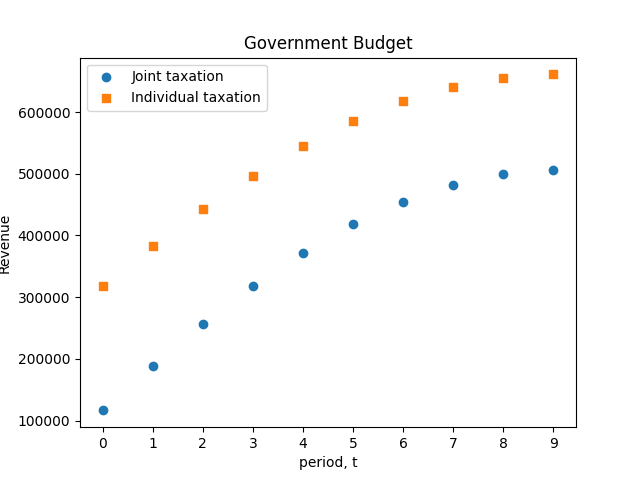

In [390]:
fig = plt.figure()
ax = plt.subplot()
ax.scatter(range(par.simT),b_tr_pp,label='Joint taxation')
ax.scatter(range(par.simT),i_tr_pp,label = 'Individual taxation', marker='s')
ax.set_title(label='Government Budget')
ax.set(xlabel='period, t', ylabel=f'Revenue', xticks=range(par.simT))
ax.legend()
plt.show()

## Q5

In [402]:
i_budget = i_tr
tax_scale_indiv = 1.75
revenue_list= []
lambda_list= []
while i_budget > b_tr:
    model = DynHouseholdLaborModelClass(par={'joint_tax': False, 'tax_scale_indiv': tax_scale_indiv})
    m_par = model.par
    m_sol = model.sol
    m_sim = model.sim
    m_sim.k1_init = np.ones(m_par.simN) * 2
    model.solve()
    model.simulate()
    i_budget = np.sum(m_sim.tax_revenue)
    print(f'Individual taxation budget {i_budget} lambda*={tax_scale_indiv}')
    revenue_list.append(i_budget)
    lambda_list.append(tax_scale_indiv)

    if i_budget - b_tr < 150000:
        tax_scale_indiv += 0.001
    else:
        tax_scale_indiv += 0.002
    lambda_star=tax_scale_indiv 

Individual taxation budget 5343914.6366622 lambda*=1.75
Individual taxation budget 5139693.709602612 lambda*=1.752
Individual taxation budget 4935538.832778698 lambda*=1.754
Individual taxation budget 4731458.180710438 lambda*=1.756
Individual taxation budget 4527456.502237236 lambda*=1.758
Individual taxation budget 4323518.972829055 lambda*=1.76
Individual taxation budget 4119666.1798740905 lambda*=1.762
Individual taxation budget 3915876.052455012 lambda*=1.764
Individual taxation budget 3712167.97557209 lambda*=1.766
Individual taxation budget 3610332.968850141 lambda*=1.767


The level of $\lambda^{private,*}$ that makes the government as well off as before the reform is 1.767

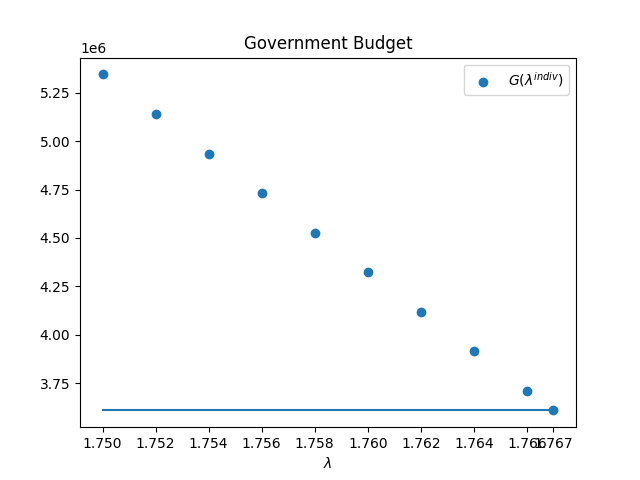

In [406]:
fig = plt.figure()
ax = plt.subplot()
ax.scatter(lambda_list,revenue_list,label='$G(\lambda^{indiv})$')
ax.plot(lambda_list,b_tr*np.ones(len(lambda_list)))
ax.set_title(label='Government Budget')
ax.set(xlabel='$\lambda$', xticks=lambda_list)
plt.tight_layout
ax.legend()
plt.show()

## Q6

In [220]:
indi_model2    = DynHouseholdLaborModelClass(par={'joint_tax':False,'tax_scale_indiv':lambda_star})
i2_par         = indi_model2.par
i2_sim         = indi_model2.sim
i2_sol         = indi_model2.sol
i2_sim.k1_init = np.ones(i2_par.simN)*2
indi_model2.solve()
indi_model2.simulate()

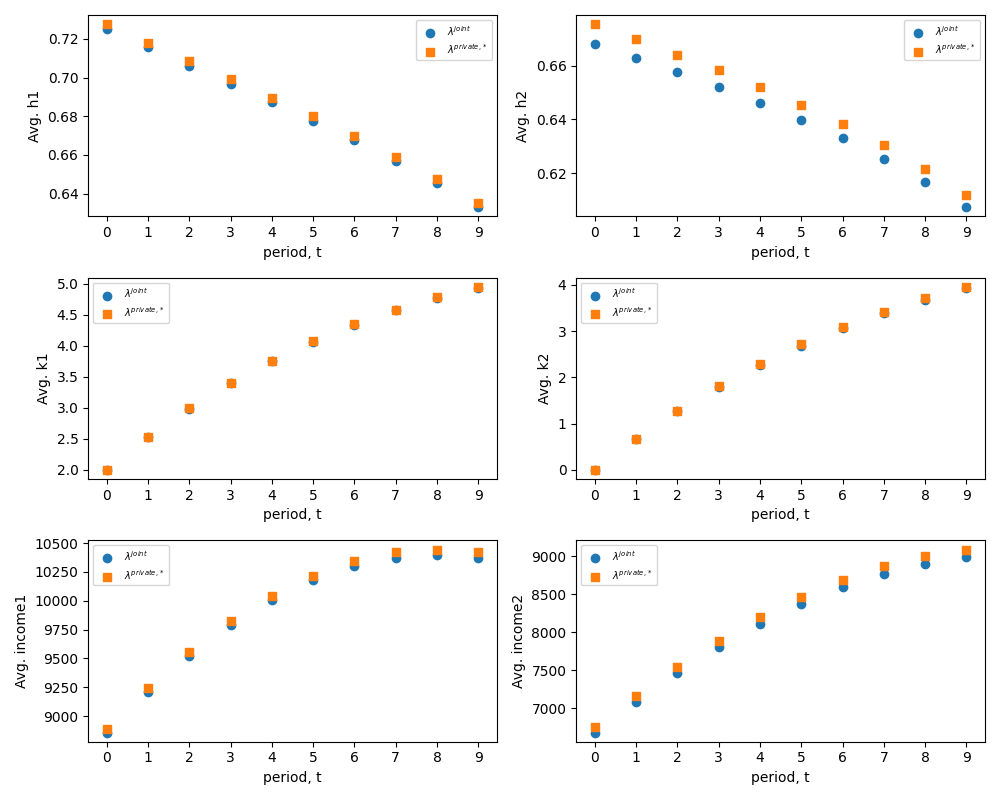

In [221]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

for i, var in enumerate(('h1', 'h2', 'k1', 'k2', 'income1', 'income2')):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.scatter(range(par.simT), np.mean(getattr(sim,var), axis=0), label='$\lambda^{joint}$')
    ax.scatter(range(par.simT), np.mean(getattr(i2_sim,var), axis=0), label='$\lambda^{private,*}$',marker='s')
    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(par.simT))
    ax.legend(loc='best',fontsize=7)
plt.tight_layout()
plt.show()

In [222]:
i2_util = indi_model2.util(i2_sim.h1,i2_sim.h2,i2_sim.k1,i2_sim.k2)

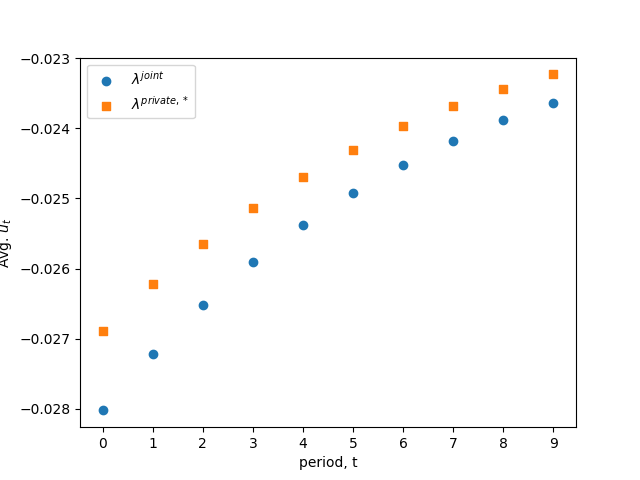

In [224]:
fig = plt.figure()
ax = plt.subplot()
ax.scatter(range(par.simT),np.mean(util,axis=0),label='$\lambda^{joint}$')
ax.scatter(range(par.simT),np.mean(i2_util,axis=0),label = '$\lambda^{private,*}$', marker='s')
ax.set_title(label='Average utility')
ax.set(xlabel='period, t', ylabel=f'Avg. $u_t$', xticks=range(par.simT))
ax.legend()
plt.show()